<a href="https://colab.research.google.com/github/deepak427/colab-projects/blob/main/Stock_market_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils import plot_model

In [26]:
#Get the Dataset
df=pd.read_csv('AmazonStockData.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
cols = ['close', 'volume', 'open', 'high', 'low']
df.columns = cols
df['close'] = df['close'].str.replace('$','', regex=False).astype(float)
df['open'] = df['open'].str.replace('$','', regex=False).astype(float)
df['high'] = df['high'].str.replace('$','', regex=False).astype(float)
df['low'] = df['low'].str.replace('$','', regex=False).astype(float)
df.head()

,close,volume,open,high,low
Date,,,,,
2024-01-26,159.12,51047350,158.42,160.720,157.9100
2024-01-25,157.75,43638590,156.95,158.505,154.5501
2024-01-24,156.87,48547320,157.80,158.510,156.4800
2024-01-23,156.02,37986040,154.85,156.210,153.9300
2024-01-22,154.78,43687470,156.89,157.050,153.9000


In [27]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape: ', df. shape)
print('Null Value Present: ', df.isnull().values.any())

Dataframe Shape:  (2517, 5)
Null Value Present:  False


<Axes: xlabel='Date'>

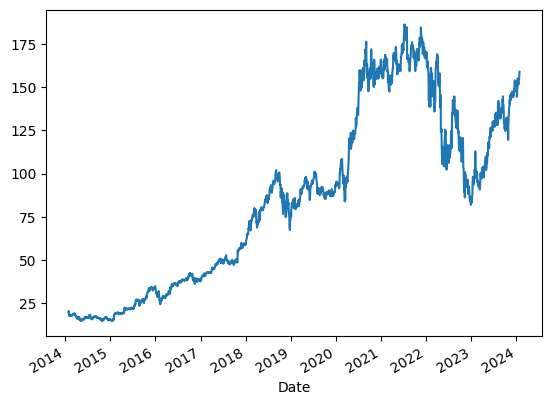

In [28]:
df['close'].plot()


In [29]:
#Set Target Variable
output_var = pd.DataFrame(df['close'])
#Selecting the Features
features = ['open', 'high', 'low', 'volume']

In [30]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,open,high,low,volume
Date,,,,
2024-01-26,0.833622,0.839583,0.842184,0.072763
2024-01-25,0.825124,0.826863,0.822494,0.056633
2024-01-24,0.830038,0.826891,0.833804,0.067320
2024-01-23,0.812984,0.813683,0.818860,0.044326
2024-01-22,0.824777,0.818507,0.818685,0.056739


In [31]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [32]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

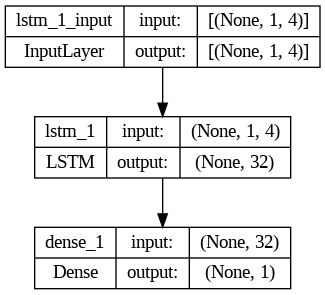

In [33]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [34]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
287/287 [==============================] - 2s 2ms/step - loss: 10726.5938
Epoch 2/100
287/287 [==============================] - 0s 2ms/step - loss: 9200.6494
Epoch 3/100
287/287 [==============================] - 0s 2ms/step - loss: 5751.7720
Epoch 4/100
287/287 [==============================] - 0s 2ms/step - loss: 2554.0984
Epoch 5/100
287/287 [==============================] - 0s 2ms/step - loss: 862.8137
Epoch 6/100
287/287 [==============================] - 1s 3ms/step - loss: 296.3273
Epoch 7/100
287/287 [==============================] - 1s 2ms/step - loss: 153.9608
Epoch 8/100
287/287 [==============================] - 1s 3ms/step - loss: 108.2401
Epoch 9/100
287/287 [==============================] - 0s 2ms/step - loss: 81.6613
Epoch 10/100
287/287 [==============================] - 0s 2ms/step - loss: 61.0977
Epoch 11/100
287/287 [==============================] - 0s 2ms/step - loss: 44.5163
Epoch 12/100
287/287 [==============================] - 0s 2ms/step - lo

In [41]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

8/8 [==============================] - 0s 2ms/step


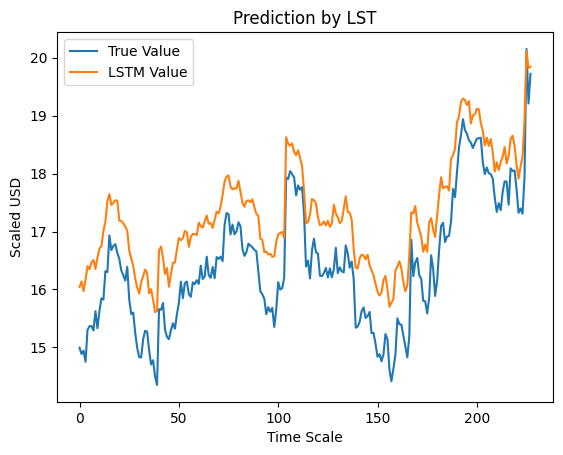

In [36]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LST')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()